<a href="https://colab.research.google.com/github/ColtdayVal/Preentrega1_CienciaDatosI/blob/main/Pre_entrega_1_Melisa_Valeria_Beltran_Garzon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Historia Climatica de los alrededores de Szeged, Hungria desde el 2006 hasta el 2016.
**Proyecto presentado por Melisa Valeria Beltran Garzon**

Encontramos la base de datos de una estacion metereologica de Szeged, Hungria que contiene registros desde el 2006 hasta el 2016, en esta Base de datos encontramos los siguientes campos:


1.   **Date**: Fecha de la toma de los registros.
2.   **Hour**: hora de la toma de los registros.
3.   Summary: Resumen es decir el tipo de clima
4.   Precip_Type: tipo de precipitación.
5.   Temperature_(C): Temperatura en grados centigrados.
6.   Apparent_Temperature_(C): Temperatura aparente en grados centigrados.
7.   Humidity: Humedad es la cantidad de vapor de agua en el aire en estado gaseoso medida en decimales.
8.   Wind_Speed_(km/h):Velocidad del viento en km/h.
9.   Wind_Bearing_(degrees): Dirección del viento grados respecto al norte.
10.  Visibility_(km): la transparencia atmosférica en una dirección horizontal sobre la superficie terrestre relativa a la visión humana.
11.  Loud_cover: Cubierta de nubes
12.  Pressure_(millibars):Presion atmosferica en milibares.
13.  Daily_Summary: resumen del clima del día.


# Hipotesis

1. ¿Hay una relación entre la temperatura y la humedad?
2. ¿Hay una relacion entre la temperatura y tipo de precipitación?
3. ¿Hay una correlación entre la visibilidad y la humedad?
4. ¿Ha aumentado o disminuido la temperatura promedio en Szeged durante el período analizado?
5. ¿Existe alguna relación entre la velocidad del viento y la presión atmosférica?
6.  ¿Cómo varía la humedad a lo largo del día?



Pasos a seguir
1. Cargar el archivo.
2. Validar los tipos de datos que tiene cada campo.
3. Validar los registros de los campos.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV en un DataFrame
file_url='https://raw.githubusercontent.com/ColtdayVal/Preentrega1_CienciaDatosI/main/WeatherHistory.csv'
#df = pd.read_csv('/content/WeatherHistory.csv', sep=';')
df=pd.read_csv(file_url, sep=';')

In [32]:
# Mostrar las primeras filas del DataFrame para entender su estructura
df.head()

,Date,Hour,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary
0,2006-01-01,0:00:00,Partly Cloudy,rain,0.58,-4.0,0.89,17.11,140,9.98,0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01,1:00:00,Mostly Cloudy,rain,1.16,-3.2,0.85,16.62,139,9.90,0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01,2:00:00,Mostly Cloudy,rain,1.67,-3.1,0.82,20.25,140,9.90,0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01,3:00:00,Overcast,rain,1.71,-2.1,0.82,14.49,140,9.90,0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01,4:00:00,Mostly Cloudy,rain,1.18,-2.7,0.86,13.94,134,9.90,0,1014.98,Mostly cloudy throughout the day.


In [33]:
#Mostrar el tipo de datos que tiene cada campo
df.dtypes

,0
Date,object
Hour,object
Summary,object
Precip_Type,object
Temperature_(C),float64
Apparent_Temperature_(C),float64
Humidity,float64
Wind_Speed_(km/h),float64
Wind_Bearing_(degrees),int64
Visibility_(km),float64


In [34]:
#Mostrar los campos tipo Variables cualitativas:
categorical = df.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Date', 'Hour', 'Summary', 'Precip_Type', 'Daily_Summary'], dtype='object')


In [35]:
#Mostrar los campos tipo Variables cuantitativas:
quantitative = df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature_(C)', 'Apparent_Temperature_(C)', 'Humidity',
       'Wind_Speed_(km/h)', 'Wind_Bearing_(degrees)', 'Visibility_(km)',
       'Loud_Cover', 'Pressure_(millibars)'],
      dtype='object')


In [36]:
#Transformar el campo 'Date':
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Hour'].str.split(':').str[0].astype(int)
df.head()

,Date,Hour,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary,year,month,day,hour
0,2006-01-01,0:00:00,Partly Cloudy,rain,0.58,-4.0,0.89,17.11,140,9.98,0,1016.66,Mostly cloudy throughout the day.,2006,1,1,0
1,2006-01-01,1:00:00,Mostly Cloudy,rain,1.16,-3.2,0.85,16.62,139,9.90,0,1016.15,Mostly cloudy throughout the day.,2006,1,1,1
2,2006-01-01,2:00:00,Mostly Cloudy,rain,1.67,-3.1,0.82,20.25,140,9.90,0,1015.87,Mostly cloudy throughout the day.,2006,1,1,2
3,2006-01-01,3:00:00,Overcast,rain,1.71,-2.1,0.82,14.49,140,9.90,0,1015.56,Mostly cloudy throughout the day.,2006,1,1,3
4,2006-01-01,4:00:00,Mostly Cloudy,rain,1.18,-2.7,0.86,13.94,134,9.90,0,1014.98,Mostly cloudy throughout the day.,2006,1,1,4


In [37]:
#Descripción de las variables cuantitativas
df[quantitative].describe()

,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932698,10.842472,0.734899,10.810692,187.509232,10.347411,0.0,1003.235956
std,9.551532,10.649347,0.195473,6.913559,107.383428,4.192376,0.0,116.969906
min,-21.820000,-27.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.690000,2.310000,0.600000,5.830000,116.000000,8.340000,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.970000,180.000000,10.050000,0.0,1016.450000
75%,18.840000,18.800000,0.890000,14.140000,290.000000,14.810000,0.0,1021.090000
max,39.910000,39.300000,1.000000,63.850000,359.000000,16.100000,0.0,1046.380000


In [38]:
# Identificación de valores perdidos
valores_perdidos = df.isnull().sum()
print("Valores perdidos por columna:\n", valores_perdidos)

Valores perdidos por columna:
 Date                          0
Hour                          0
Summary                       0
Precip_Type                 517
Temperature_(C)               0
Apparent_Temperature_(C)      0
Humidity                      0
Wind_Speed_(km/h)             0
Wind_Bearing_(degrees)        0
Visibility_(km)               0
Loud_Cover                    0
Pressure_(millibars)          0
Daily_Summary                 0
year                          0
month                         0
day                           0
hour                          0
dtype: int64


# Nos damos cuenta que el campo Precip_Type tiene 517 valores nulos

array([[<Axes: title={'center': 'Temperature_(C)'}>,
        <Axes: title={'center': 'Apparent_Temperature_(C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind_Speed_(km/h)'}>,
        <Axes: title={'center': 'Wind_Bearing_(degrees)'}>,
        <Axes: title={'center': 'Visibility_(km)'}>],
       [<Axes: title={'center': 'Loud_Cover'}>,
        <Axes: title={'center': 'Pressure_(millibars)'}>, <Axes: >]],
      dtype=object)

<Figure size 1500x1500 with 0 Axes>

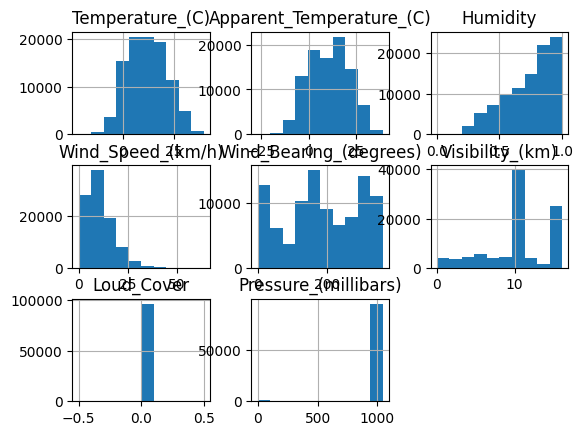

In [39]:
#Identificar valores irregulares mediante el uso de histogramas
#Mostrar histogramas de las variables cuantitativas:
plt.figure(figsize=(15, 15))
df[quantitative].hist()


# como podemos observar de acuerdo a los histogramas,

# 1. nos damos cuenta que el campo Loud_Cover solo tiene valores Cero
# 2. La presion tiene valores cero.


In [40]:
#Eliminamos el Campo Loud_Cover, ya que tiene valores cero
df=df.drop('Loud_Cover',axis=1)

<Axes: >

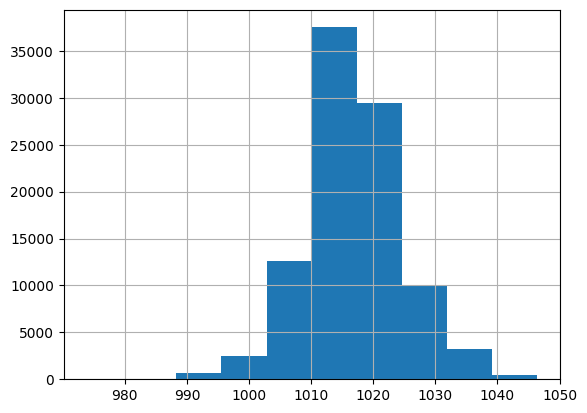

In [41]:
# Algunos registros tienen valores cero, la presion no toma valor cero, por lo tanto vamos
#a rellenar los ceros con la mediana:
pressure_median = df['Pressure_(millibars)'].median()

def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x

df["Pressure_(millibars)"] = df.apply(lambda row:pressure(row["Pressure_(millibars)"]) , axis = 1)
df['Pressure_(millibars)'].hist()

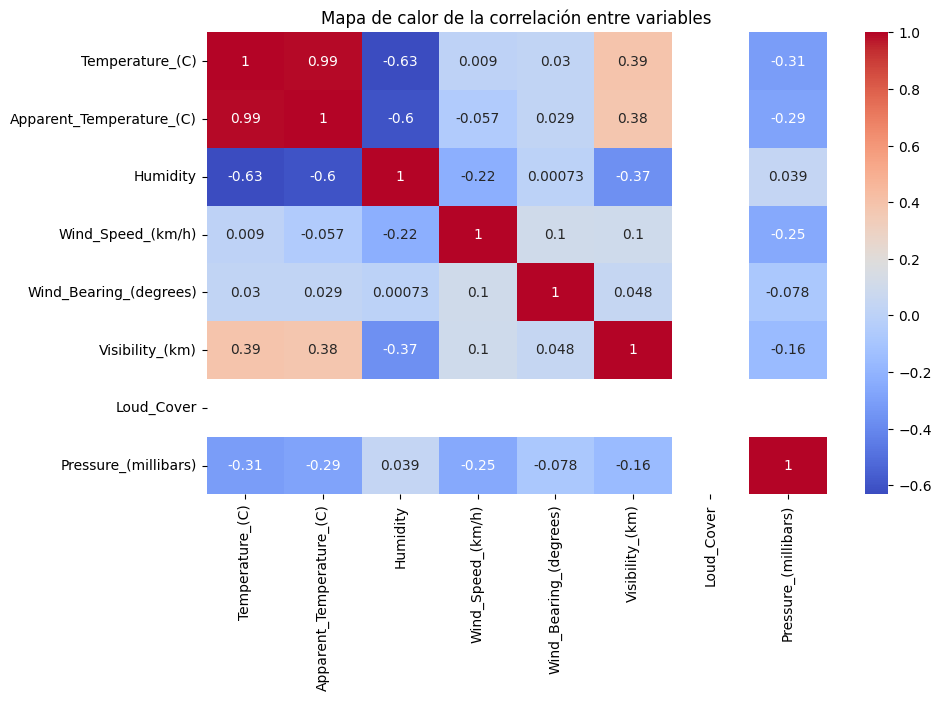

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Gráfico: Heatmap de la correlación entre variables (Seaborn)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre variables')
plt.show()

# Hipótesis 1: Relación entre la temperatura y la humedad
Pregunta: ¿Existe una correlación entre la temperatura y la humedad?

Gráfico: Gráfico de dispersión para observar la relación entre Temperature_(C) y Humidity.

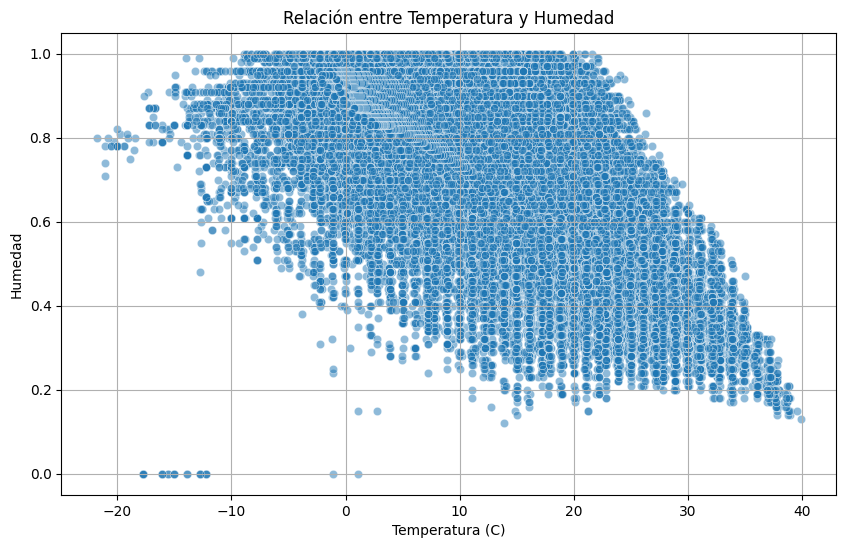

In [42]:
# Hipótesis 1: Relación entre la temperatura y la humedad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature_(C)', y='Humidity', data=df, alpha=0.5)
plt.title('Relación entre Temperatura y Humedad')
plt.xlabel('Temperatura (C)')
plt.ylabel('Humedad')
plt.grid(True)
plt.show()

# Conclusión
De acuerdo a lo observado podemos decir que existe una correlacción entre la humedad y la temperatura, mientras la temperatura aumenta la humedad disminuye y viceversa

# Hipótesis 2: Relación entre la temperatura y el tipo de precipitación
Pregunta: ¿Cómo varía la temperatura según el tipo de precipitación?

Gráfico: Boxplot para comparar las temperaturas bajo diferentes Precip_Type.


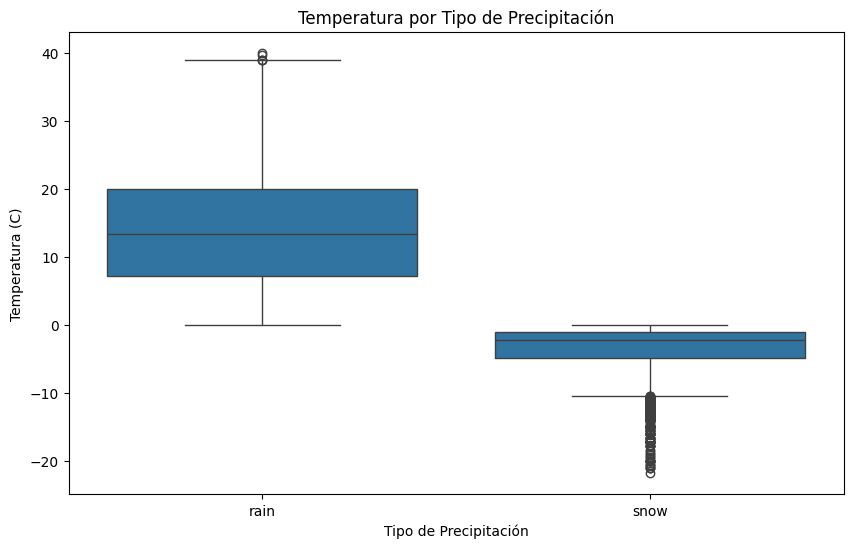

In [44]:
# Hipótesis 2: Relación entre la temperatura y tipo de precipitación
# Debemos sacar los 517 datos nulos que tiene el campo Precip_Type
df['Precip_Type'].value_counts(dropna=False)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Precip_Type', y='Temperature_(C)', data=df)
plt.title('Temperatura por Tipo de Precipitación')
plt.xlabel('Tipo de Precipitación')
plt.ylabel('Temperatura (C)')
plt.show()

# Conclusión
Podemos decir que cae nieve cuando la temperatura esta grados de congelación, es decir entre 0 °C y -20 °C, por otro lado, podemos decir que llueve cuando la temperatura esta por encima de la congelación (es mayor a 0°C)

# Hipótesis 3: Relación entre la visibilidad y la humedad
Pregunta: ¿Cómo afecta la humedad a la visibilidad?

Gráfico: Gráfico de dispersión para observar la relación entre Visibility_(km) y Humidity.

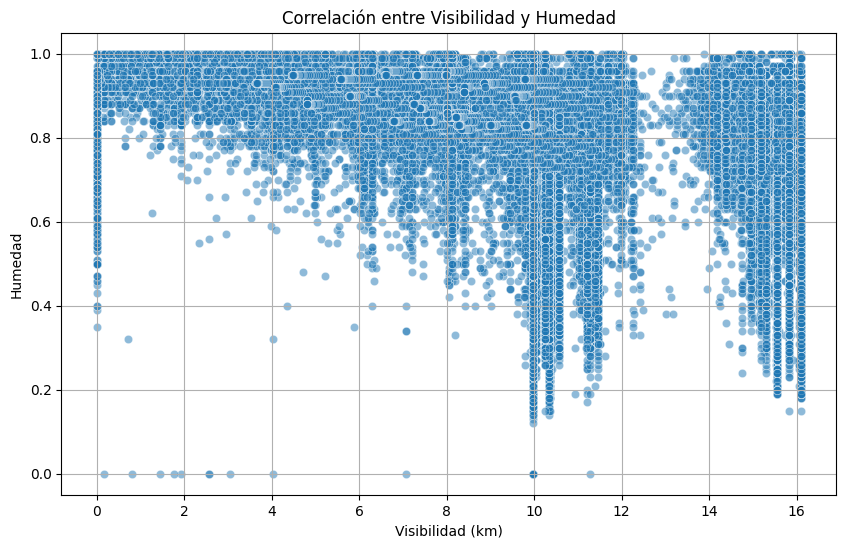

In [48]:
# Hipótesis 3: Correlación entre la visibilidad y la humedad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Visibility_(km)', y='Humidity', data=df, alpha=0.5)
plt.title('Correlación entre Visibilidad y Humedad')
plt.xlabel('Visibilidad (km)')
plt.ylabel('Humedad')
plt.grid(True)
plt.show()

#Conclusión
Podemos decir que la Visibilidad fue inferior a 4 km cuando la humedad superaba el 80%, tambien que hay casos donde a pesar de tener humedades altas era visible.

# Hipótesis 4: Cambio en la temperatura promedio anual en Szeged
Pregunta: ¿Ha habido un cambio en la temperatura promedio anual en Szeged durante el período analizado?

Gráfico: Gráfico de líneas mostrando la evolución de la temperatura promedio anual.

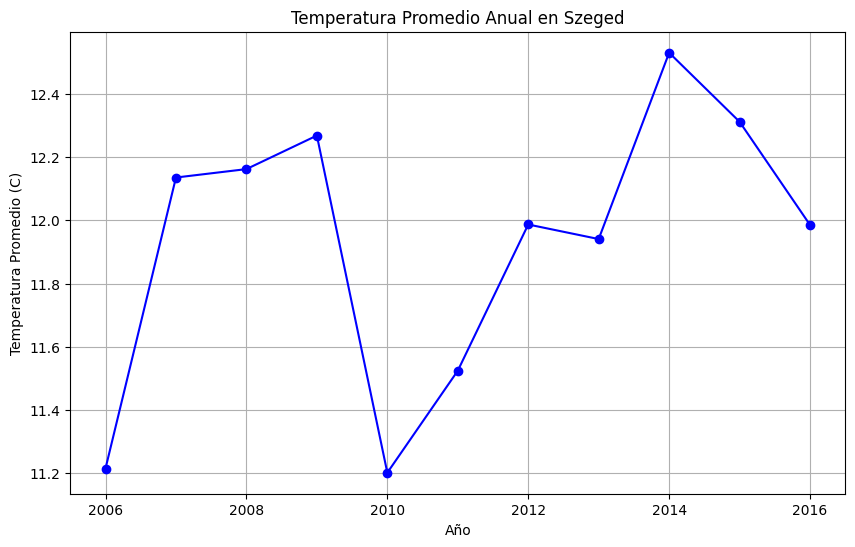

In [50]:
# Hipótesis 4: Variación de la temperatura promedio en Szeged durante el período analizado
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
temp_por_año = df.groupby('Year')['Temperature_(C)'].mean()
plt.figure(figsize=(10, 6))
plt.plot(temp_por_año.index, temp_por_año.values, marker='o', linestyle='-', color='blue')
plt.title('Temperatura Promedio Anual en Szeged')
plt.xlabel('Año')
plt.ylabel('Temperatura Promedio (C)')
plt.grid(True)
plt.show()

#Conclusión
La temperatura promedio de Szeged oscila entre 11.2 y 12.6 °C, lo cual nos indica que la temperatura es casi constante y no tiene una gran variabilidad, ya que la amplitud en la cual se mueve es de 1.4 °C grados.

# Hipótesis 5: Relación entre la velocidad del viento y la presión atmosférica
Pregunta: ¿Existe alguna relación entre la velocidad del viento y la presión atmosférica?

Gráfico: Gráfico de dispersión para observar la relación entre Wind_Speed_(km/h) y Pressure_(millibars).


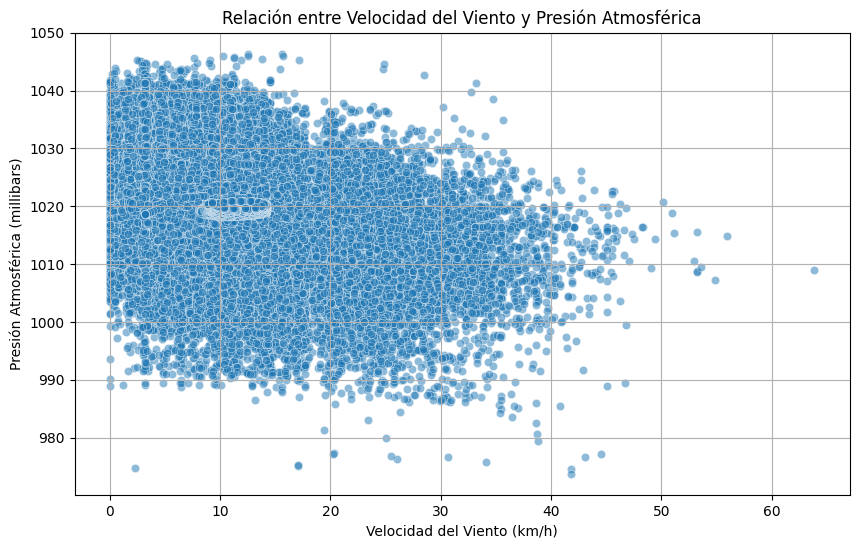

In [51]:
# Hipótesis 5: Correlación entre la velocidad del viento y la presión atmosférica
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wind_Speed_(km/h)', y='Pressure_(millibars)', data=df, alpha=0.5)
plt.title('Relación entre Velocidad del Viento y Presión Atmosférica')
plt.xlabel('Velocidad del Viento (km/h)')
plt.ylabel('Presión Atmosférica (millibars)')
plt.grid(True)
plt.show()

#Conclusión
No existe una relacion entre la presion entre los datos tomados, pero si tuvieramos un dato adicional de cambio de presion se podria decir que la diferencia de presiones cambia la velocidad del viento

#Hipótesis 6: Variación de la humedad en diferentes horas del día
Pregunta: ¿Cómo varía la humedad a lo largo del día?

Gráfico: Boxplot o gráfico de líneas que muestre la variación de Humidity según Hour.

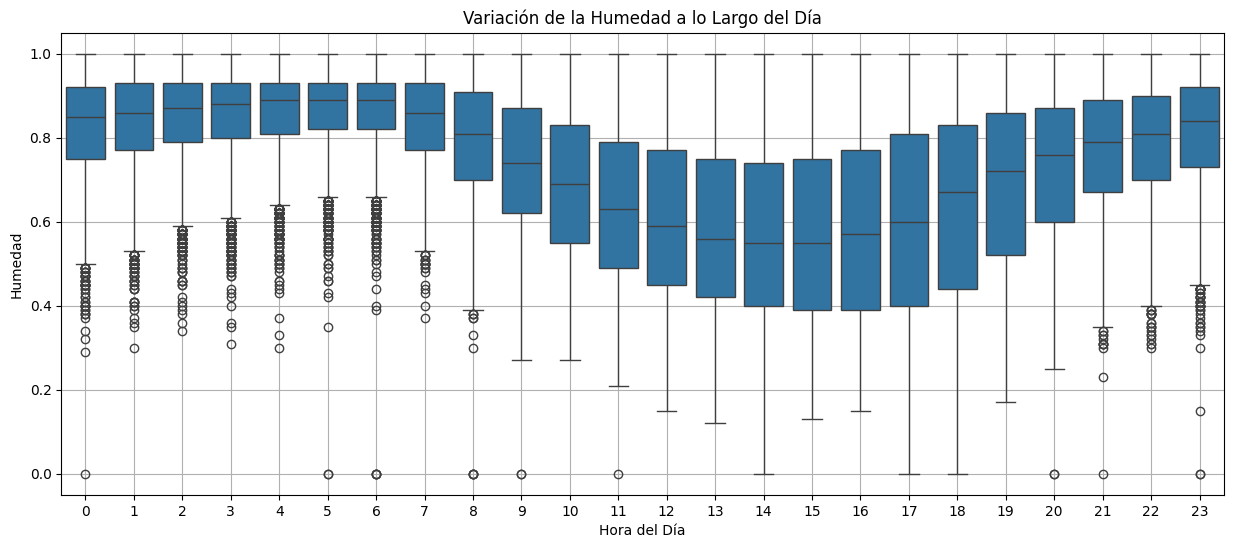

In [57]:
# Hipótesis 6: Variación de la humedad en diferentes horas del día
plt.figure(figsize=(15, 6))
sns.boxplot(x='hour', y='Humidity', data=df)
plt.title('Variación de la Humedad a lo Largo del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Humedad')
plt.grid(True)
plt.show()

#Conclusión
Como podemos observar la humedad disminuye entre las 11 y 17 horas del día